In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.target.shape

(1797,)

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.images.shape

(1797, 8, 8)

0


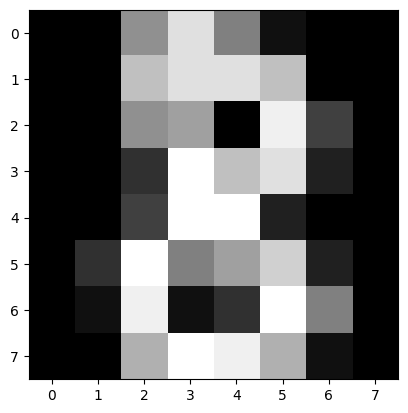

In [6]:
import matplotlib.pyplot as plt

x = digits.images[8]

print(digits.target[0])
plt.gray()
plt.imshow(x)
plt.show()

# Preprocess

In [7]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(digits.data , digits.target , test_size=0.3)

In [8]:
x_train[0]

array([ 0.,  0.,  6., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,
       12.,  0.,  0.,  0.,  0.,  0.,  4., 15., 11.,  0.,  0.,  0.,  0.,
        6., 16., 16., 16., 13.,  0.,  0.,  0., 11., 16., 16.,  5.,  1.,
        0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
        1.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.])

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform( x_train)
x_test = scaler.transform(x_test)

In [10]:
x_train[0]

array([0.        , 0.        , 0.375     , 1.        , 1.        ,
       0.1875    , 0.        , 0.        , 0.        , 0.        ,
       0.5       , 1.        , 1.        , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.25      ,
       0.9375    , 0.6875    , 0.        , 0.        , 0.        ,
       0.        , 0.375     , 1.        , 1.        , 1.        ,
       0.86666667, 0.        , 0.        , 0.        , 0.6875    ,
       1.        , 1.        , 0.3125    , 0.07142857, 0.        ,
       0.        , 0.        , 0.        , 0.875     , 0.4375    ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.25      , 1.        , 0.0625    , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.6875    , 0.6875    ,
       0.        , 0.        , 0.        , 0.        ])

# PCA

In [11]:
x_train.shape , x_test.shape

((1257, 64), (540, 64))

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

x_train.shape ,x_test.shape

((1257, 32), (540, 32))

# Performance metric

In [13]:
from sklearn.metrics import accuracy_score , recall_score, precision_score

def calculate_metrics(x_train, y_train ,y_pred_train , y_pred_test):
    acc_tarin = accuracy_score(y_true=y_train ,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test ,y_pred=y_pred_test)
    
    p = precision_score(y_test , y_pred_test , average="weighted")
    r = recall_score(y_test , y_pred_test , average="weighted")
    
    print(f"acc train : {acc_tarin}\nacc test : {acc_test}\nprecision : {p}\nrecall : {r}")
    return acc_tarin , acc_test , p , r

# Classification

# 1. Random forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=128 , n_estimators=256)
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [15]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_tarin_rf , acc_test_rf , p_rf , r_rf = calculate_metrics(x_train, y_train ,y_pred_train , y_pred_test)

acc train : 1.0
acc test : 0.9666666666666667
precision : 0.9668571256665974
recall : 0.9666666666666667


# 2. SVM

In [16]:
from sklearn.svm import SVC

svm = SVC(kernel="poly")
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [17]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_tarin_svm , acc_test_svm, p_svm , r_svm = calculate_metrics(x_train, y_train ,y_pred_train , y_pred_test)

acc train : 1.0
acc test : 0.9666666666666667
precision : 0.9668571256665974
recall : 0.9666666666666667


# 3. ANN

In [18]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256 , batch_size=64 , solver="adam" , learning_rate="adaptive")
ann.fit(x_train , y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=256, learning_rate='adaptive')

In [19]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_tarin_ann , acc_test_ann , p_ann , r_ann = calculate_metrics(x_train, y_train ,y_pred_train , y_pred_test)

acc train : 1.0
acc test : 0.9740740740740741
precision : 0.9744185422512451
recall : 0.9740740740740741


# 4. KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=8)

In [21]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_tarin_knn , acc_test_knn , p_knn , r_knn = calculate_metrics(x_train, y_train ,y_pred_train , y_pred_test)

acc train : 1.0
acc test : 0.9666666666666667
precision : 0.9668571256665974
recall : 0.9666666666666667


# Comparison

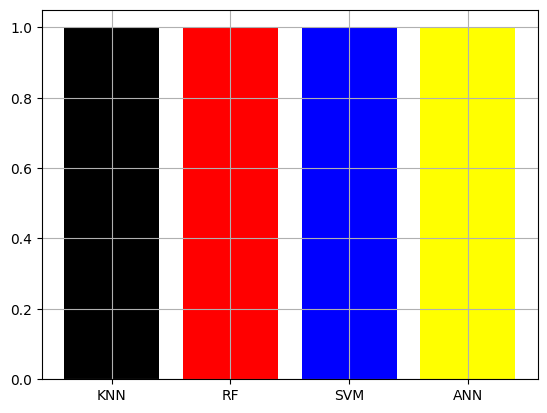

In [22]:
import matplotlib.pylab as plt

acc_tarin = [acc_tarin_knn , acc_tarin_rf , acc_tarin_svm , acc_tarin_ann]
title = ["KNN" , "RF" , "SVM" ,"ANN"]
colors = ["black" , "red" ,"blue" ,"yellow"]
plt.bar(title , acc_tarin , color=colors)
plt.grid()
plt.show()

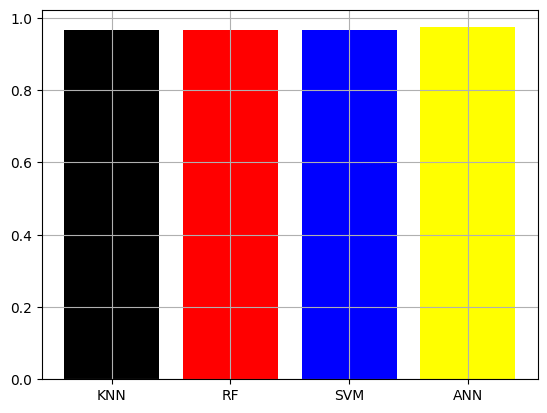

In [23]:
acc_test = [acc_test_knn , acc_test_rf , acc_test_svm , acc_test_ann]
title = ["KNN" , "RF" , "SVM" ,"ANN"]
colors = ["black" , "red" ,"blue" ,"yellow"]
plt.bar(title , acc_test , color=colors)
plt.grid()
plt.show()

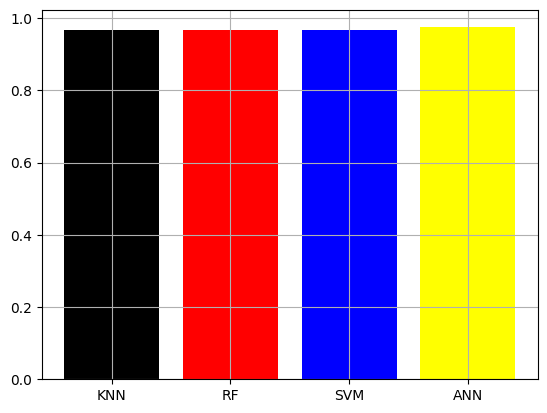

In [24]:
p = [p_knn , p_rf , p_svm , p_ann]
title = ["KNN" , "RF" , "SVM" ,"ANN"]
colors = ["black" , "red" ,"blue" ,"yellow"]
plt.bar(title , p , color=colors)
plt.grid()
plt.show()

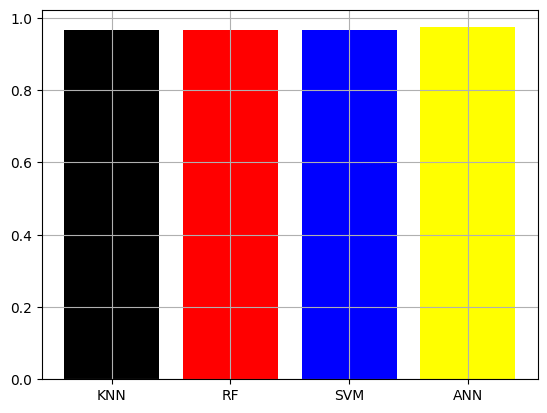

In [25]:
r = [r_knn , r_rf , r_svm , r_ann]
title = ["KNN" , "RF" , "SVM" ,"ANN"]
colors = ["black" , "red" ,"blue" ,"yellow"]
plt.bar(title , r , color=colors)
plt.grid()
plt.show()

In [26]:
from sklearn.naive_bayes import GaussianNB

n = GaussianNB()
n.fit(x_train,y_train)

GaussianNB()

In [27]:
y_pred_train = n.predict(x_train)
y_pred_test = n.predict(x_test)

acc_tarin_n , acc_test_n , p_n , r_n = calculate_metrics(x_train, y_train ,y_pred_train , y_pred_test)

acc train : 0.954653937947494
acc test : 0.9407407407407408
precision : 0.9440859740545731
recall : 0.9407407407407408
